   # DS LAB - 3                                                                         
   # RAJNI GUPTA
   # 20190802012


# PERFORMING EDA ON TITANIC DATASET


In [147]:
# Importing Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [148]:
# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

dataset=pd.read_csv('Titanic_Dataset.csv')

# Print shape of dataset with rows and columns
print(dataset.shape)


# Printing top5 records
dataset.head()


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### By Studying the dataSet we found, 
### TARGET VARIABLE / DEPENDENT VARIABLE : Survived
### Nominal Variables : PassengerId, Passenger name, tickets, Cabin



#   
## 1. Identification of Missing Values

In [149]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

for feature in features_with_na:
        print(feature,np.round(dataset[feature].isnull()))
        

Age 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    1.0
889    0.0
890    0.0
Name: Age, Length: 891, dtype: float16
Cabin 0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
886    1.0
887    0.0
888    1.0
889    0.0
890    1.0
Name: Cabin, Length: 891, dtype: float16
Embarked 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    0.0
889    0.0
890    0.0
Name: Embarked, Length: 891, dtype: float16


### Observation :  Age, Cabin, Embarked has null values.

## 2. Identification of All The Numerical Variables 


In [150]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
print("\n")
print('Number of numerical variables: {}\nThey are :'.format(len(numerical_features)))
for f in numerical_features:
    print("    ",f)
    



Number of numerical variables: 7
They are :
     PassengerId
     Survived
     Pclass
     Age
     SibSp
     Parch
     Fare


### Observation : Calculations can be done on 'PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Alone' variables only.

## 3. Distribution of Numerical Variable


C:\Users\Rajni Gupta\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


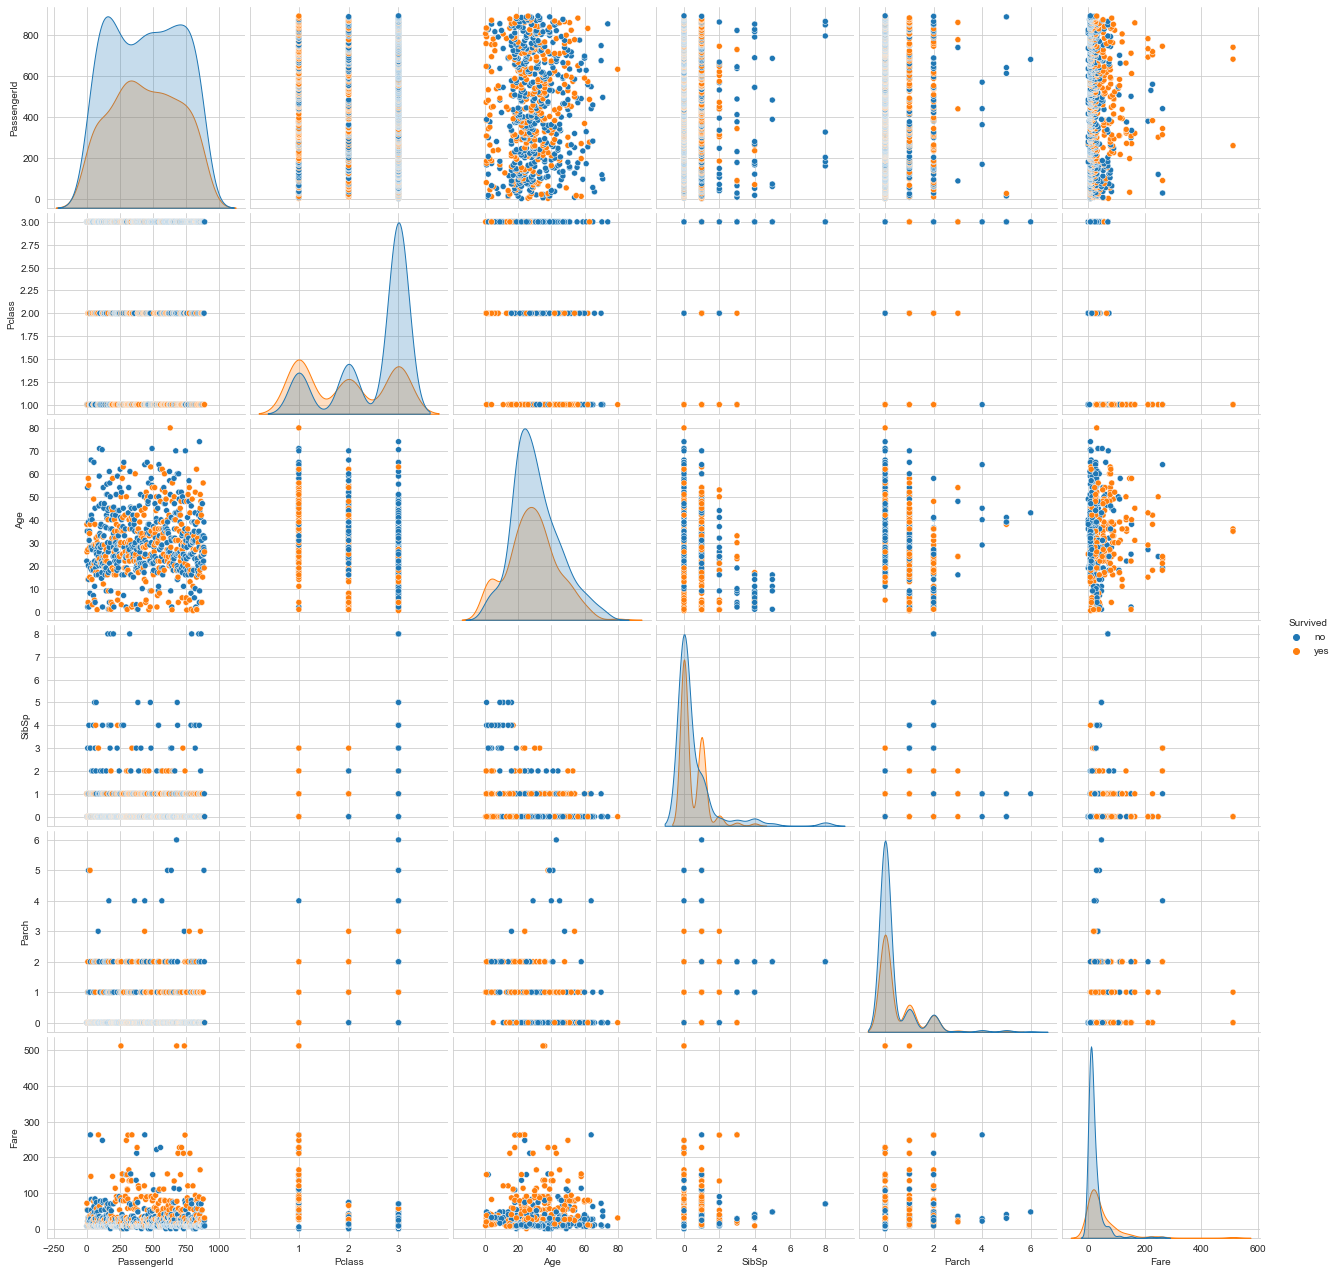

In [151]:
sns.set_style("whitegrid");
sns.pairplot(dataset[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], hue="Survived", size=3);
plt.show()



### Observations : Conditions for people having a higher chance to survive include
### 1.Passengers who paid higher fares or traveling in the upper class.
### 2.Young persons have a higher chance to survive than old peoples.

In [152]:
# visualise the numerical variables
dataset[numerical_features].head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


## 4. Identification of Categorical Variables.


In [153]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
print(dataset[categorical_features].head())


                                                Name     Sex  \
0                            Braund, Mr. Owen Harris    male   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                             Heikkinen, Miss. Laina  female   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                           Allen, Mr. William Henry    male   

             Ticket Cabin Embarked  
0         A/5 21171   NaN        S  
1          PC 17599   C85        C  
2  STON/O2. 3101282   NaN        S  
3            113803  C123        S  
4            373450   NaN        S  


In [154]:
print("Observation : ")
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))
    

Observation : 
The feature is Name and number of categories are 891
The feature is Sex and number of categories are 2
The feature is Ticket and number of categories are 681
The feature is Cabin and number of categories are 148
The feature is Embarked and number of categories are 4


#    
## 5. Cardinality of Categorical Variables (number of unique categories in a variable)


In [155]:
print("Category : Cardinality\n")

data[['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']].nunique()


Category : Cardinality



Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

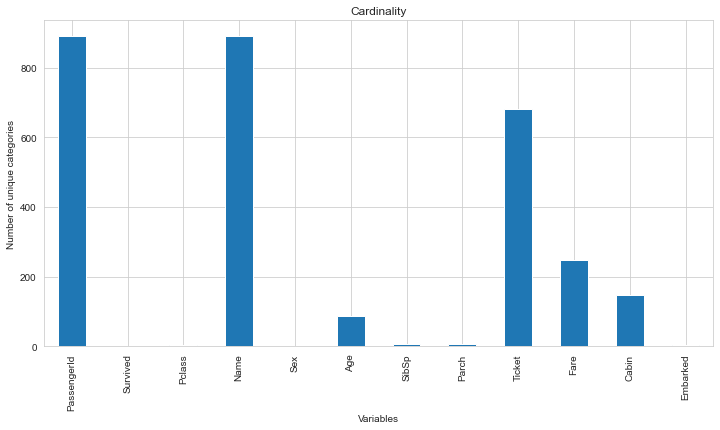

In [156]:
## Depicting Cardinality Graphically

dataset.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')
sns.set_style("whitegrid")


### Observation : PassengerId, Name, Ticket has highest number of unique values.

##   
##  6. Identification of Outliers.

#### Continuous Features is an important aspect in order to Identify of Outliers.Therefore,finding discrete features and if categorical_features not in discrete_feature gives us Continuous Features.

In [157]:
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

# visualise the Discrete variables
dataset[discrete_feature].head()


Discrete Variables Count: 4


,Survived,Pclass,SibSp,Parch
0,0,3,1,0
1,1,1,1,0
2,1,3,0,0
3,1,1,1,0
4,0,3,0,0


In [158]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

# visualise the Continuous variables
dataset[continuous_feature].head()


Continuous feature Count 3


,PassengerId,Age,Fare
0,1,22.0,7.2500
1,2,38.0,71.2833
2,3,26.0,7.9250
3,4,35.0,53.1000
4,5,35.0,8.0500


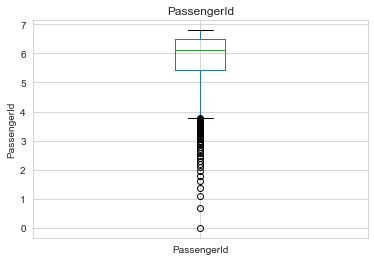

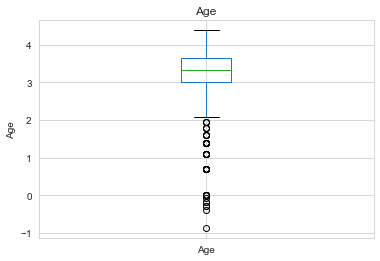

In [159]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

### Observation : Our data is skewed since we are getting non-symmetrical figure.

## 7.Find out the relationship between independent variables and dependent variable "Survived"


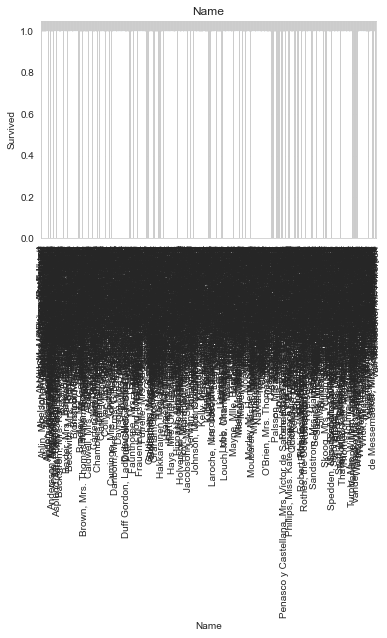

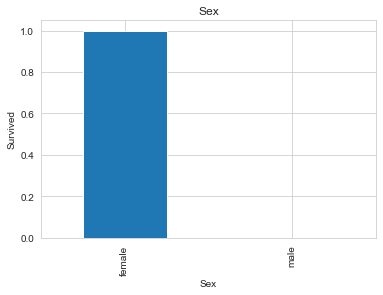

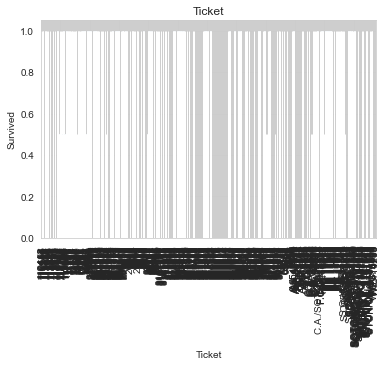

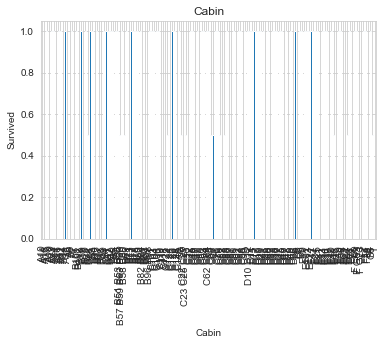

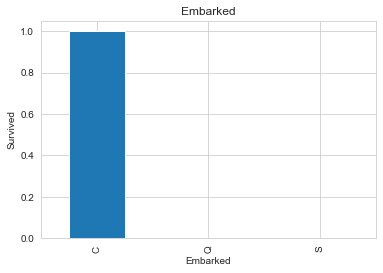

In [160]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['Survived'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Survived')
    plt.title(feature)
    
    plt.show()


# EXTRAS

### Understanding the relationship between independent variables using HEAT MAP by finding correlation between the variables. 

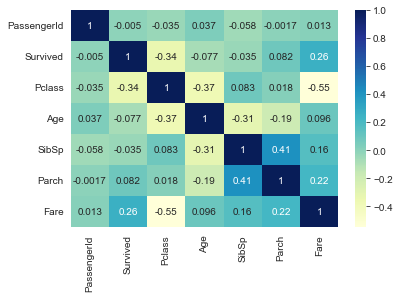

In [161]:
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()


## Count Plot

C:\Users\Rajni Gupta\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

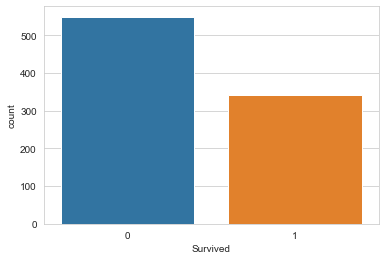

In [162]:
sns.countplot(dataset["Survived"],data = dataset)


### Observation : we get the count of each category(Survived or Died) which implies approximately 60 % people survived.

## Catplot

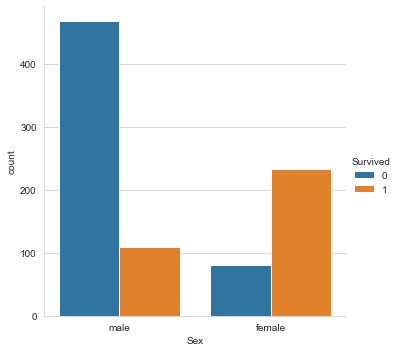

In [163]:
sns.catplot(x ="Sex", hue ="Survived",kind ="count", data = dataset)
sns.set_style("whitegrid")


### Observations - 
### Out of all male passengers most of them died. And out of all Female passengers, most of them survived.So in conclusion we can say a male passenger has a higher chance to die and female passengers have a higher   chance to survive. 
### Or Because of the Ladies First policy, priorities were given to female passengers so the chances of survival for female passengers is increased than male passengers.

#    
#     
## Heatmap

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

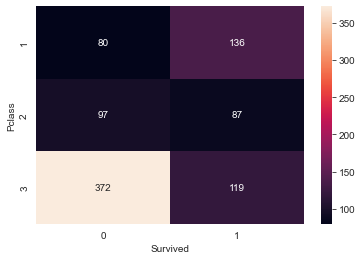

In [164]:
# Group the dataset by Pclass and Survived and then unstack them
group = dataset.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")


### Observation : Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate.

## Violinplot

<AxesSubplot:xlabel='Sex', ylabel='Age'>

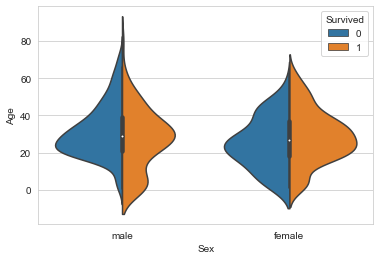

In [165]:
# Violinplot Displays distribution of data across all levels of a category.

sns.set_style("whitegrid");
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = dataset, split = True)


### Observation : This graph gives a summary of the age range of men, women and children who were saved. The survival rate is –  Good for children, high for women in the age range 20-50, less for men as the age increases.


## Catplot

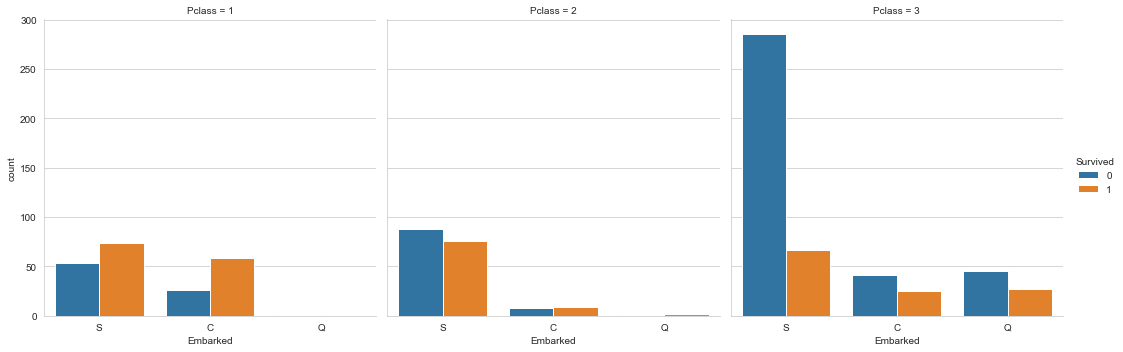

In [166]:
sns.set_style("whitegrid");
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = dataset)


#   
### Observations :
### 1. Majority of the passengers boarded from S. So, the missing values can be filled with S.
### 2. Majority of class 3 passengers boarded from Q .
### 3. S looks lucky for class 1 and 2 passengers compared to class 3.

## Fetching some info about numerical features


### .describe()  gives us Results of  Central Tendencies possible with a Numerical Variable.

In [168]:
dataset.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Drawing Conclusion from Target Variable

In [169]:
# Replacing 1 as yes and 0 as no. 
data["Survived"] = data["Survived"].map({1:"yes" , 0 :"no"})
data["Survived"].value_counts()


no     549
yes    342
Name: Survived, dtype: int64

### Observation : We can see out of 891 passengers, 549 can not survive and 342 Survived in that disaster. So the data is neither  imbalanced nor perfectly balanced.

 
## Observing Fare Variable

C:\Users\Rajni Gupta\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Rajni Gupta\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rajni Gupta\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


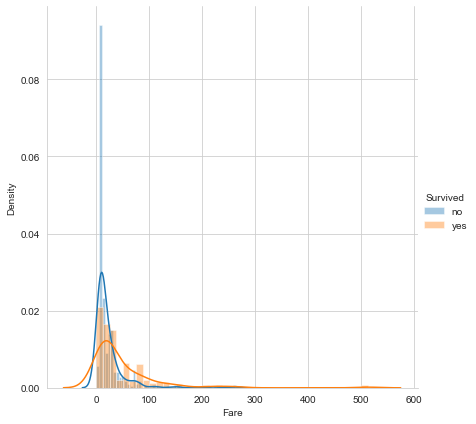

In [170]:
sns.FacetGrid(data, hue="Survived", size=6).map(sns.distplot, "Fare").add_legend()
plt.show()


#  
#    
### Observation :
### Passengers who paid low fare have a higher chance to die. On the other hand, passengers who paid high fair have a higher chance to survive. This observation is the same as pclass persons who were rich have a higher chance to survive and poor lower chance to survive.

C:\Users\Rajni Gupta\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Rajni Gupta\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


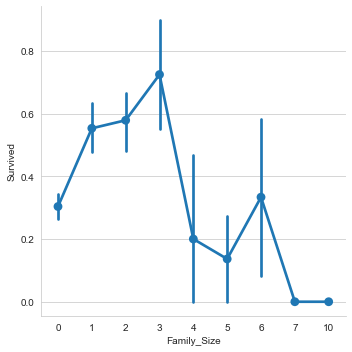

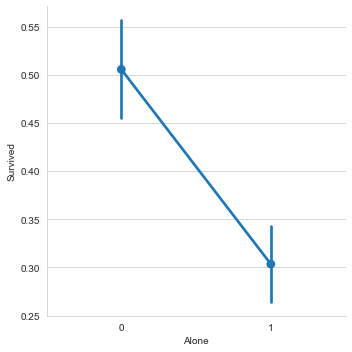

In [171]:
# Adding a column Family_Size
dataset['Family_Size'] = 0
dataset['Family_Size'] = dataset['Parch']+dataset['SibSp']
 
# Adding a column Alone
dataset['Alone'] = 0
dataset.loc[dataset.Family_Size == 0, 'Alone'] = 1
 
# Factorplot for Family_Size
sns.factorplot(x ='Family_Size', y ='Survived', data = dataset)
 
# Factorplot for Alone
sns.factorplot(x ='Alone', y ='Survived', data = dataset)


### Observations :
### 1. If a passenger is alone, the survival rate is less.
### 2. If the family size is greater than 5, chances of survival decrease considerably

# CONCLUSION :


## Thus,I studied the "Titanic" Dataset and conluded the following :
## 1. The dataset is neither  imbalanced nor perfectly balanced since out of 891 passengers, 549 can not survive and 342 Survived  in that disaster.
## 2. Passengers who paid higher fares or traveling in the upper class.
## 3. Young persons have a higher chance to survive than old peoples.
## 4. PassengerId, Name, Ticket has highest number of unique values.
## 5. It can be approximated that the survival rate of men is around 20% and that of women is around 75%. Therefore, Gender plays an important role in determining if one is going to survive or not
## 6.  This observation is the same as pclass persons who were rich have a higher chance to survive and poor lower chance to survive.

#  
